## EDA - Task 3

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

In [20]:
flights = pd.read_csv('data/flights_10000.csv')

## **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.

Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [3]:
weather_delay_df = flights[['fl_date','origin_city_name','dest_city_name', 'orig_weather_categ','dest_weather_categ', 'arr_delay', 'dep_delay']]

In [4]:
weather_delay_df.head()

,fl_date,origin_city_name,dest_city_name,orig_weather_categ,dest_weather_categ,arr_delay,dep_delay
0,2018-07-10,"San Antonio, TX","Nashville, TN",cloudy,cloudy,-2.0,-3.0
1,2019-10-10,"Chicago, IL","Orlando, FL",rain,rain,-9.0,-3.0
2,2019-07-18,"Lawton/Fort Sill, OK","Dallas/Fort Worth, TX",sunny,sunny,8.0,6.0
3,2018-11-25,"Savannah, GA","Chicago, IL",cloudy,snow & rain,NaN,NaN
4,2018-10-24,"Detroit, MI","Santa Ana, CA",sunny,sunny,28.0,-1.0


In [5]:
#fill nans
weather_delay_df['arr_delay'] = weather_delay_df['arr_delay'].fillna(0)
weather_delay_df['dep_delay'] = weather_delay_df['dep_delay'].fillna(0)

C:\Users\3_hal\AppData\Local\Temp\ipykernel_4468\3044744755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_delay_df['arr_delay'] = weather_delay_df['arr_delay'].fillna(0)
C:\Users\3_hal\AppData\Local\Temp\ipykernel_4468\3044744755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_delay_df['dep_delay'] = weather_delay_df['dep_delay'].fillna(0)


In [6]:
weather_delay_df.head()

,fl_date,origin_city_name,dest_city_name,orig_weather_categ,dest_weather_categ,arr_delay,dep_delay
0,2018-07-10,"San Antonio, TX","Nashville, TN",cloudy,cloudy,-2.0,-3.0
1,2019-10-10,"Chicago, IL","Orlando, FL",rain,rain,-9.0,-3.0
2,2019-07-18,"Lawton/Fort Sill, OK","Dallas/Fort Worth, TX",sunny,sunny,8.0,6.0
3,2018-11-25,"Savannah, GA","Chicago, IL",cloudy,snow & rain,0.0,0.0
4,2018-10-24,"Detroit, MI","Santa Ana, CA",sunny,sunny,28.0,-1.0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='orig_weather_categ', ylabel='dep_delay'>

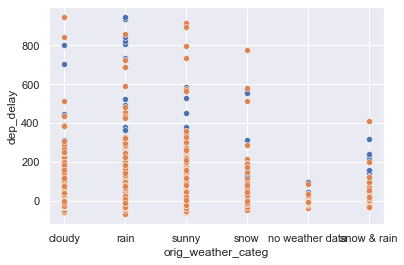

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data = weather_delay_df, x = 'orig_weather_categ', y = 'dep_delay')
sns.scatterplot(data = weather_delay_df, x = 'dest_weather_categ', y = 'arr_delay')

In [9]:
avg_origin_conditions = weather_delay_df.groupby(['orig_weather_categ'])['dep_delay'].mean().reset_index()
avg_dest_conditions = weather_delay_df.groupby(['dest_weather_categ'])['arr_delay'].mean().reset_index()

avg_dest_conditions.sort_values(by='arr_delay', inplace=True)
avg_origin_conditions.sort_values(by='dep_delay', inplace=True)

In [10]:
avg_dest_conditions.head()

,dest_weather_categ,arr_delay
1,no weather data,-2.509804
5,sunny,1.277980
0,cloudy,5.076594
2,rain,10.915039
4,snow & rain,17.579545


In [11]:
#drop "no weather data" and "empty"
avg_dest_conditions.drop(2, inplace = True)   # no data
avg_dest_conditions.drop(1, inplace = True)   # empty

In [12]:
avg_dest_conditions

,dest_weather_categ,arr_delay
5,sunny,1.277980
0,cloudy,5.076594
4,snow & rain,17.579545
3,snow,28.395210


In [13]:
avg_origin_conditions.drop(2, inplace = True)   # no data
avg_origin_conditions.drop(1, inplace = True)   # empty

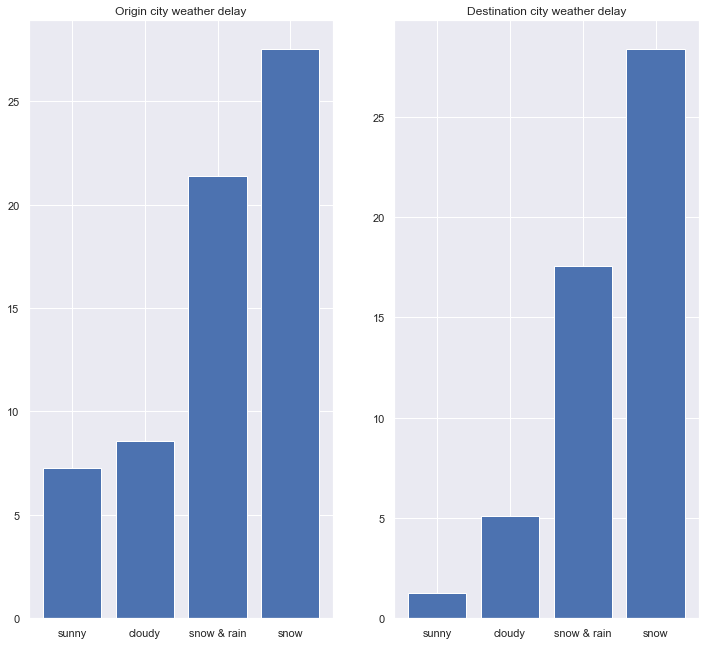

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12,11))

ax[0].bar(avg_origin_conditions['orig_weather_categ'], avg_origin_conditions['dep_delay'])
ax[0].set_title('Origin city weather delay')

ax[1].bar(avg_dest_conditions['dest_weather_categ'], avg_dest_conditions['arr_delay'])
ax[1].set_title('Destination city weather delay')

plt.show()

### Origin City & Departure Delay
let's compare the distribution of each weather condition

In [15]:
sunny_arr_delay = weather_delay_df[weather_delay_df['orig_weather_categ'] == 'sunny']['arr_delay']
sunny_arr_delay

2        8.0
4       28.0
8       -9.0
9      -12.0
10      10.0
        ... 
9990   -20.0
9991   -15.0
9992   -26.0
9996     0.0
9999     3.0
Name: arr_delay, Length: 4749, dtype: float64

In [16]:
cloudy_arr_delay = weather_delay_df[weather_delay_df['orig_weather_categ'] == 'cloudy']['arr_delay']
rain_arr_delay = weather_delay_df[weather_delay_df['orig_weather_categ'] == 'rain']['arr_delay']
rain_snow_arr_delay = weather_delay_df[weather_delay_df['orig_weather_categ'] == 'snow & rain']['arr_delay']
snow_arr_delay = weather_delay_df[weather_delay_df['orig_weather_categ'] == 'snow']['arr_delay']

In [17]:
st.f_oneway(sunny_arr_delay, cloudy_arr_delay, rain_arr_delay, rain_snow_arr_delay, snow_arr_delay)

F_onewayResult(statistic=34.699989873969585, pvalue=8.132893028519337e-29)

In [18]:
# Function to interperet the results for us
def oneway_results(list_distributions, nullhyp, alpha):
    """
    returns the result of the test
    Params:
    list_distributions - list of distributions for comparison
    nullhyp - string of your hypothesis
    alpha - integer for significance
    """
    test = st.f_oneway(*list_distributions)
    print(f'Null hypothesis tested: {nullhyp}')
    if test[1] < alpha:
        print(f'P-val = {test[1]}\n Result: Reject the null hypothesis; samples are significantly different.\n')
    else:
        print(f'P-val = {test[1]}\n Result: Fail to reject the null hypothesis.\n')

In [19]:
lst = [sunny_arr_delay, cloudy_arr_delay, rain_arr_delay, rain_snow_arr_delay, snow_arr_delay]
oneway_results(lst, "These 5 weather conditions are from the same distribution.", 0.05)

Null hypothesis tested: These 5 weather conditions are from the same distribution.
P-val = 8.132893028519337e-29
 Result: Reject the null hypothesis; samples are significantly different.

